#### 5) 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요
파이토치 텐서의 뷰(View)는 Numpy에서의 reshape와 같은 역할을 한다. 텐서의 크기(Shape)를 변경해주는 역할을 한다. 실습을 위해 우선 임의로 다음과 같이 3차원 텐서를 만든다.

In [6]:
import numpy as np
import torch

t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [7]:
print(ft.shape)

torch.Size([2, 2, 3])


현재 위 텐서의 크기는 (2, 2, 3)이다.
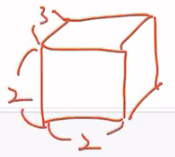

#### 5-1) 3차원 텐서에서 2차원 텐서로 변경
이제 ft 텐서를 ```view```를 사용하여 크기(shape)를 2차원 텐서로 변경해본다.

In [8]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


view(\[-1, 3\])이 가지는 의미는 이와 같다. -1은 첫번째 차원은 사용자가 잘 모르겠으니 pytorch에 맡기겠다는 뜻이고, 3은 두번째 차원의 길이는 3을 가지도록 하라는 의미다. 다시 말해 현재 3차원 텐서를 2차원 텐서로 변경하되 (?, 3)의 크기로 변경하라는 의미다. 결과적으로 (4, 3)의 크기를 가지는 텐서를 얻었다.
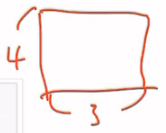
내부적으로 크기 변환은 (2, 2, 3) -> (2 x 2, 3) -> (4, 3)과 같이 이루어졌다. <br>
규칙을 정리해보자.
- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 한다.
- pytorch의 view 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추한다.

#### 5-2) 3차원 텐서의 크기 변경
이번에는 3차원 텐서로 차원은 유지하되, 크기(shape)를 바꾸는 작업을 해본다.

In [9]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


#### 6) 스퀴즈(Squeeze) - 1인 차원을 제거한다.
스퀴즈는 차원이 1인 경우에 해당 차원을 제거한다.

In [10]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


해당 텐서는 (3 x 1)의 크기를 가진다. 두번째 차원이 1이므로 ```.squeeze```를 사용하면 (3,)의 크기를 가지는 텐서로 변경된다.

In [11]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


#### 7) 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.
언스퀴즈는 스퀴즈와 정반대다. 특정 위치에 1인 차원을 추가할 수 있다.

In [12]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


현재는 차원이 1개인 1차원 벡터다. 첫번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 첫번째 차원에 1인 차원이 추가된다.

In [13]:
print(ft.unsqueeze(0))
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


위 결과는 (3,) 크기를 가졌던 1차원 벡터가 (1, 3)의 2차원 텐서로 변경된 것을 보여준다. 방금 한 연산을 앞서 배운 view로도 구현이 가능하다.

In [14]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


위의 결과는 unsqueeze와 view가 동일한 결과를 만든 것을 보여준다. 이번에는 unsqueeze의 인자로 1을 넣어본다.

In [15]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


이번에는 -1을 넣어보며 인덱스 상으로 마지막 차원을 의미한다.

In [16]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


#### 8) 타입 캐스팅(Type Casting)
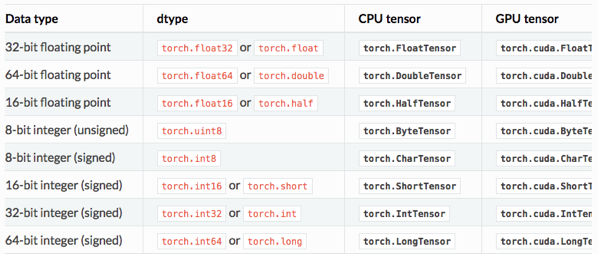
텐서에는 자료형이 있는데 각 데이터형별로 정의되어져 있다. 예를 들어 32비트 부동 소수점은 torch.FloatTensorfmf, 64비트의 부호 있는 정수는 torch.LongTensor를 사용한다. GPU 연산을 위한 자료형(torch.cuda.FloatTensor 등등)도 있다.<br><br>
그리고 이 자료형을 변환하는 것을 타입 캐스팅이라고 한다.

In [17]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


텐서에다가 ```.float()```를 붙이면 바로 float형으로 타입이 변경된다. 

In [18]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [19]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [20]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


#### 9) 연결하기(concatenate)
이번에는 두 텐서를 연결하는 방법에 대해 알아본다.

In [22]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

이제 두 텐서를 torch.cat([])를 통해 연결해본다. 연결 방법이 한 가지만 있는 것은 아니다. ```torch.cat```은 어느 차원을 늘릴 것인지 인자로 줄 수 있다. 예를 들어 dim=0은 첫번째 차원을 늘리라는 의미를 담고 있다.

In [23]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


dim=0을 인자로 했더니 두 개의 (2 x 2)텐서가 (4 x 2) 텐서가 된 것을 볼 수 있다.<br>
이번에는 dim=1을 인자로 해본다.

In [24]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


dim=1을 인자로 했더니 두 개의 (2 x 2) 텐서가 (2 x 4)텐서가 된 것을 볼 수 있다.

#### 10) 스택킹(Stacking)
연결(concatenate)을 하는 또 다른 방법으로 스택킹(Stacking)이 있다. 스택킹은 영어로 쌓는다는 의미이며 때로는 연결 하는 것보다 스택킹이더 편리할 때가 있는데, 이는 스택킹이 많은 연산을 포함하고 있기 때문이다.

In [25]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

```torch.stack```을 통해서 3개의 벡터를 모두 스택킹해본다.

In [27]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


위 결과는 3개의 벡터가 순차적으로 쌓여 (3 x 2) 텐서가 된 것을 보여준다.
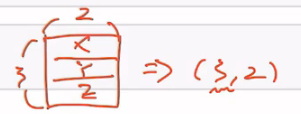
스택킹은 많은 연산을 한 번에 축약하고 있다. 예를 들어 위 작업은 아래의 코드와 동일한 작업이다.

In [28]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


x, y, z는 기존에는 전부 (2,)의 크기를 가졌는데 .unsqueeze(0)을 하므로서 3개의 벡터는 전부 (1, 2)의 크기의 2차원 텐서로 변경된다. 여기에 연결(concatenate)를 의미하는 cat을 사용하면 (3 x 2) 텐서가 된다.

스택킹에 추가적으로 dim을 인자로 줄 수도 있다. dim=1 인자를 준다. 이는 두번째 차원이 증가하도록 쌓으라는 의미로 해석할 수 있다.

In [29]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


위의 결과는 두번째 차원이 증가하도록 스택킹이 된 결과를 보여준다.<br>
결과적으로 (2 x 3) 텐서가 된다.
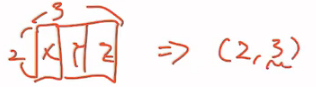

#### 11) ones_like 와 zeros_like - 0 으로 채워진 텐서와 1로 채워진 텐서

In [30]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


위 텐서에 ones_like를 하면 동일한 크기(shape)지만 1으로만 값이 채웢니 텐서를 생성한다.

In [31]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


위 텐서에 zeros_like를 하면 동일한 크기(shape)지만 0으로만 값이 채워진 텐서를 생성한다.

In [32]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### 12) In-place Operation (덮어쓰기 연산)

In [33]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [34]:
print(x.mul(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


첫번째 출력은 곱하기 2가 수행된 결과를 보여주고, 두번째 출력은 기존의 값이 그대로 출력된 것을 확인할 수 있다. 곱하기 2를 수행했지만 이를 x에다가 다시 저장하지 않았으니, 곱하기 연산을 하더라도 기존의 값 x는 변하지 않는 것이 당연하다. <br><br>
그런데 연산 뒤에 ```_```를 붙이면 기존의 값을 덮어쓰기한다.

In [35]:
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
